In [2]:
import pandas as pd

In [3]:
# 곡 정보 파일 불러오기
df = pd.read_csv('../SongTidy/FinalTidy/tidydata/song_tidy03.csv')

In [4]:
# 가수 정보 파일 불러오기
df2 = pd.read_csv('../Data/Data20180921/artist_info_combined_ver04.csv', encoding='euc-kr')

In [5]:
# 곡 정보와 가수 정보를 머지해준다.
song = pd.merge(df, df2, on='artist')

In [6]:
# 가사 분석에 용이하도록 <br>을 공백으로 바꿔준다.
song['lyrics'] = song['lyrics'].str.replace(r'<br>', ' ')

In [45]:
female = song[song['gender'] == '여']
female.shape

(3338, 20)

In [46]:
male = song[song['gender'] == '남']
male.shape

(5869, 20)

In [9]:
# 전체 곡의 장르를 살펴본다.
song.song_genre.value_counts()

Dance                   5369
Ballad                  2208
Rap / Hip-hop            621
Rock                     501
R&B / Soul               432
Drama                    210
기타                        42
Electronica               39
Animation                 24
Drama,Ballad              23
Drama,Dance               18
Pop                       16
Korean Movie              14
Folk                      10
Musical                    8
Game                       6
Drama,Rock                 5
Korean Movie,Ballad        3
Animation,Dance            2
Adult Contemporary         2
Drama,Folk                 1
Electronica,Dance          1
Dance,Electronica          1
국내CCM                      1
Jazz                       1
Korean Movie,Rock          1
Ballad,Rap / Hip-hop       1
Korean Traditional         1
동요                         1
Blues                      1
Drama,Rap / Hip-hop        1
Rap / Hip-hop,Dance        1
Animation,Rock             1
Name: song_genre, dtype: int64

In [10]:
# 여자아이돌 곡의 장르를 살펴본다.
genre_f = female.song_genre.value_counts()
genre_f

Dance                   2256
Ballad                   706
Drama                    106
R&B / Soul               100
Rap / Hip-hop             57
Rock                      23
Electronica               22
기타                        16
Animation                 15
Drama,Ballad               8
Drama,Dance                7
Game                       4
Korean Movie               4
Pop                        3
Folk                       2
Adult Contemporary         1
Electronica,Dance          1
Jazz                       1
Blues                      1
Korean Movie,Ballad        1
Animation,Dance            1
동요                         1
Korean Traditional         1
Ballad,Rap / Hip-hop       1
Name: song_genre, dtype: int64

In [11]:
genre_m = male.song_genre.value_counts()
genre_m

Dance                  2890
Ballad                 1371
Rap / Hip-hop           564
Rock                    478
R&B / Soul              332
Drama                   103
기타                       26
Electronica              17
Drama,Ballad             15
Pop                      13
Drama,Dance              11
Korean Movie             10
Animation                 9
Musical                   8
Folk                      7
Drama,Rock                5
Korean Movie,Ballad       2
Drama,Rap / Hip-hop       1
Animation,Rock            1
Korean Movie,Rock         1
Animation,Dance           1
Dance,Electronica         1
Drama,Folk                1
Adult Contemporary        1
Rap / Hip-hop,Dance       1
Name: song_genre, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import numpy as np

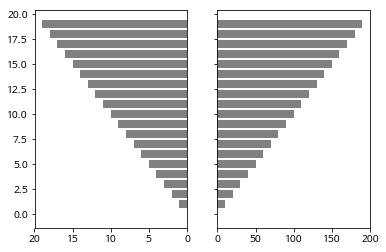

<Figure size 2880x5760 with 0 Axes>

In [34]:
y = range(20)
x1 = range(20)
x2 = range(0, 200, 10)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray')
axes[1].barh(y, x2, align='center', color='gray')
axes[0].invert_xaxis()
plt.figure(figsize=(40,80))
plt.show()

In [49]:
def percent(num1, num2):
    num1 = float(num1)
    num2 = float(num2)
    percentage = '{0:.2f}'.format((num1 / num2 * 10))
    return percentage

In [50]:
percent(2256, 3338)

'6.76'

In [51]:
percent(706, 3338)

'2.12'

In [52]:
percent(106, 3338)

'0.32'

In [53]:
percent(100, 3338)

'0.30'

In [54]:
percent(57, 3338)

'0.17'

In [55]:
percent(23, 3338)

'0.07'

In [56]:
percent(22, 3338)

'0.07'

In [57]:
percent(68, 3338)

'0.20'

In [59]:
percent(2890, 5869)

'4.92'

In [60]:
percent(1371, 5869)

'2.34'

In [61]:
percent(564, 5869)

'0.96'

In [62]:
percent(478, 5869)

'0.81'

In [63]:
percent(332, 5869)

'0.57'

In [64]:
percent(103, 5869)

'0.18'

In [66]:
percent(17, 5869)

'0.03'

In [65]:
percent(114, 5869)

'0.19'

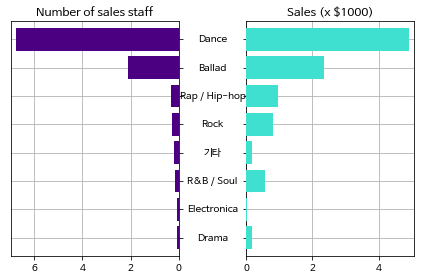

In [71]:
# Dance                   2256
# Ballad                   706
# Drama                    106
# R&B / Soul               100
# Rap / Hip-hop             57
# Rock                      23
# Electronica               22
# 기타                        16

# Dance                  2890
# Ballad                 1371
# Rap / Hip-hop           564
# Rock                    478
# R&B / Soul              332
# Drama                   103
# 기타                       26
# Electronica              17

# Data
states = ["Dance", "Ballad", "Rap / Hip-hop", "Rock", "R&B / Soul", "Drama", "Electronica", "기타"]
staff = np.array([6.76, 2.12, 0.32, 0.30, 0.17, 0.07, 0.07, 0.20])
sales = np.array([4.92, 2.34, 0.96, 0.81, 0.57, 0.18, 0.03, 0.19])
# sales = staff * (20 + 10 * np.random.random(staff.size))

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

x = np.arange(staff.size)
y = np.arange(sales.size)

# matplotlib.colors.to_rgb(c)
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, staff, align='center', color='indigo', zorder=10)
axes[0].set(title='Number of sales staff')
axes[1].barh(y, sales, align='center', color='turquoise', zorder=10)
axes[1].set(title='Sales (x $1000)')

axes[0].invert_xaxis()
# axes[0].set(yticks=y, yticklabels=states)
axes[0].set(yticks=y, yticklabels=[])
for yloc, state in zip(y, states):
    axes[0].annotate(state, (0.5, yloc), xycoords=('figure fraction', 'data'),
                     ha='center', va='center')
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)


fig.tight_layout()
fig.subplots_adjust(wspace=0.4)
plt.show()

In [23]:
ax?

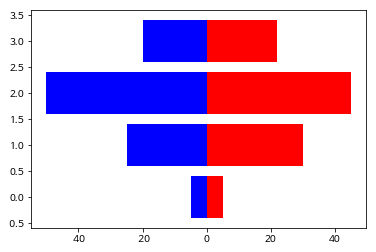

In [15]:
import numpy as np
import matplotlib.pyplot as plt

women_pop = np.array([5., 30., 45., 22.])
men_pop     = np.array( [5., 25., 50., 20.])
X = np.arange(4)

plt.barh(X, women_pop, color = 'r')
plt.barh(X, -men_pop, color = 'b')
plt.show()

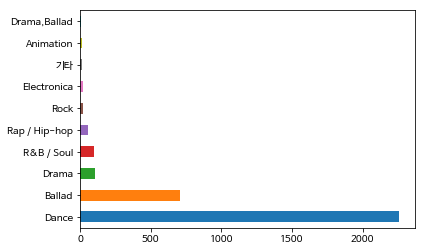

In [12]:
# 정렬 반대로 하고 싶다
female['song_genre'].value_counts()[:10].plot(kind='barh')

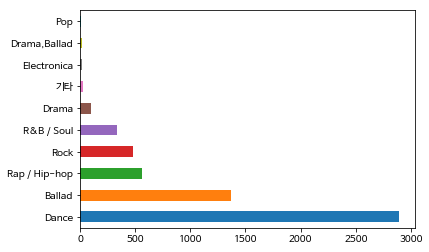

In [13]:
# 정렬 반대로 하고 싶다
male['song_genre'].value_counts()[:10].plot(kind='barh')

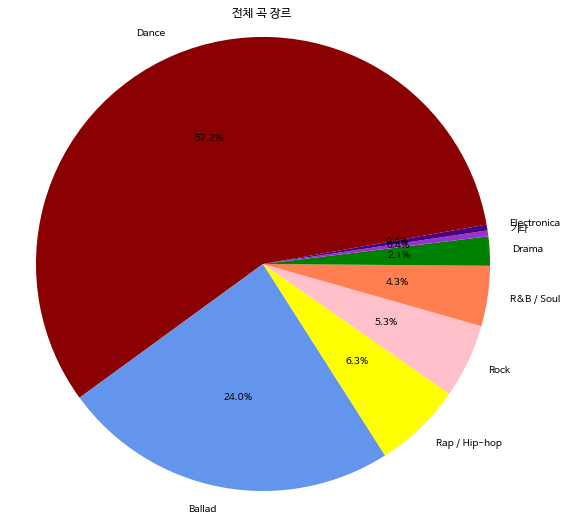

In [14]:
# song['song_genre'].value_counts()[:8].plot(kind='pie')
# # plt.axis("image")
# plt.axis('equal')
# plt.rcParams.update({'font.size': 10})
# fig = plt.gcf()
# fig.set_size_inches(7,7)

# Dance                      5363
# Ballad                     2249
# Rap / Hip-hop               588
# Rock                        494
# R&B / Soul                  402
# Drama                       194
# 기타                           39
# Electronica                  39

labels = 'Dance', 'Ballad', 'Rap / Hip-hop', 'Rock', 'R&B / Soul', 'Drama', '기타', 'Electronica', 
sizes = [5363, 2249, 588, 494, 402, 194, 39, 39]

color=["darkred", "cornflowerblue","yellow","pink","coral","green","darkorchid","indigo",]
plt.title('전체 곡 장르')
# Plot
plt.pie(sizes, labels=labels, colors=color,
       autopct='%1.1f%%', startangle=10)

plt.rcParams.update({'font.size': 8})
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.show()


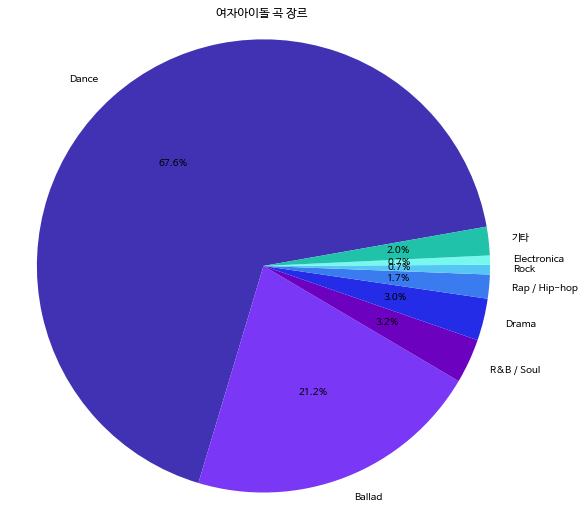

In [119]:
labels = 'Dance', 'Ballad', 'R&B / Soul', 'Drama', 'Rap / Hip-hop', 'Rock', 'Electronica', '기타'
sizes = [2256, 706, 106, 100, 57, 23, 22, 68]

color=["#4032b3", "#7A37F5","#6c02c0","#242ce8","#3a7cf0","#56c7f5","#76f8ef",'#20C2AA']
plt.title('여자아이돌 곡 장르')
# Plot
plt.pie(sizes, labels=labels, colors=color,
       autopct='%1.1f%%', startangle=10)

plt.rcParams.update({'font.size': 10})
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.show()

# Dance                   2256
# Ballad                   706
# Drama                    106
# R&B / Soul               100
# Rap / Hip-hop             57
# Rock                      23
# Electronica               22
# 기타                        16  #2600a3    #3d08bc

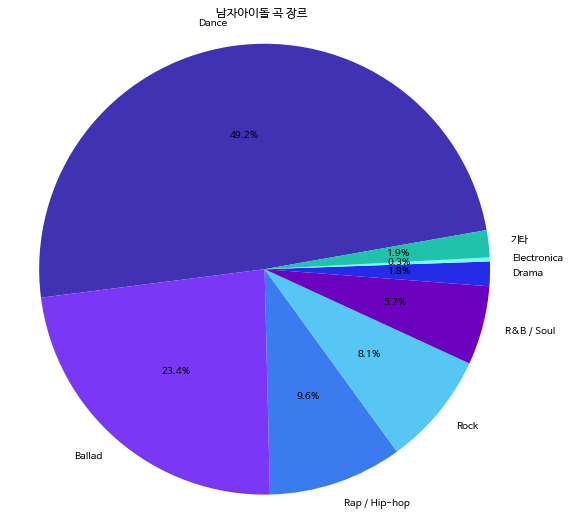

In [121]:
labels = 'Dance', 'Ballad', 'Rap / Hip-hop', 'Rock', 'R&B / Soul', 'Drama', 'Electronica', '기타'
sizes = [2890, 1371, 564, 478, 332, 103, 17, 114]

color=["#4032b3", "#7A37F5","#3a7cf0","#56c7f5","#6c02c0","#242ce8","#76f8ef",'#20C2AA']
# color=["darkred", "cornflowerblue","yellow","pink","coral","green","darkorchid","lightblue"]
plt.title('남자아이돌 곡 장르')
# Plot
plt.pie(sizes, labels=labels, colors=color,
       autopct='%1.1f%%', startangle=10)


plt.rcParams.update({'font.size': 10})
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.show()

# Dance                  2890
# Ballad                 1371
# Rap / Hip-hop           564
# Rock                    478
# R&B / Soul              332
# Drama                   103
# 기타                       26
# Electronica              17

In [ ]:
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)

In [122]:
time_series = pd.DataFrame({
    "generation" : ["1", "1", "2", "2", "3", "3"],
    "title" : ["oppa", "nuna", "oppa", "nuna", "oppa", "nuna"],
    "value" : [0.081, 0.037, 0.081, 0.065, 0.194, 0.050],
})
time_series

,generation,title,value
0,1,oppa,0.081
1,1,nuna,0.037
2,2,oppa,0.081
3,2,nuna,0.065
4,3,oppa,0.194
5,3,nuna,0.050


In [148]:
pd.crosstab(
    song.gender,
    song.song_genre,
    margins=True,
)

song_genre,Adult Contemporary,Animation,"Animation,Dance","Animation,Rock",Ballad,"Ballad,Rap / Hip-hop",Blues,Dance,"Dance,Electronica",Drama,...,Musical,Pop,R&B / Soul,Rap / Hip-hop,"Rap / Hip-hop,Dance",Rock,국내CCM,기타,동요,All
gender,,,,,,,,,,,,,,,,,,,,,
남,1,9,1,1,1371,0,0,2890,1,103,...,8,13,332,564,1,478,0,26,0,5869
여,1,15,1,0,706,1,1,2256,0,106,...,0,3,100,57,0,23,0,16,1,3338
혼,0,0,0,0,131,0,0,223,0,1,...,0,0,0,0,0,0,1,0,0,359
All,2,24,2,1,2208,1,1,5369,1,210,...,8,16,432,621,1,501,1,42,1,9566


In [172]:
genre = song.groupby(["gender", "song_genre"]).size().unstack(0)

In [156]:
genre_result = genre.div(genre.sum(axis=1), axis=0)
genre_result

gender,남,여,혼
song_genre,,,
Adult Contemporary,0.500000,0.500000,NaN
Animation,0.375000,0.625000,NaN
"Animation,Dance",0.500000,0.500000,NaN
"Animation,Rock",1.000000,NaN,NaN
Ballad,0.620924,0.319746,0.059330
"Ballad,Rap / Hip-hop",NaN,1.000000,NaN
Blues,NaN,1.000000,NaN
Dance,0.538275,0.420190,0.041535
"Dance,Electronica",1.000000,NaN,NaN


In [157]:
genre_result = genre_result.drop(columns=['혼'])
genre_result

gender,남,여
song_genre,,
Adult Contemporary,0.500000,0.500000
Animation,0.375000,0.625000
"Animation,Dance",0.500000,0.500000
"Animation,Rock",1.000000,NaN
Ballad,0.620924,0.319746
"Ballad,Rap / Hip-hop",NaN,1.000000
Blues,NaN,1.000000
Dance,0.538275,0.420190
"Dance,Electronica",1.000000,NaN


In [158]:
genre_result = genre_result.dropna()
genre_result

gender,남,여
song_genre,,
Adult Contemporary,0.500000,0.500000
Animation,0.375000,0.625000
"Animation,Dance",0.500000,0.500000
Ballad,0.620924,0.319746
Dance,0.538275,0.420190
Drama,0.490476,0.504762
"Drama,Ballad",0.652174,0.347826
"Drama,Dance",0.611111,0.388889
Electronica,0.435897,0.564103


In [160]:
order = genre_result.columns.tolist()
order

['남', '여']

In [161]:
order = order[-1:] + order[:-1]
order

['여', '남']

In [163]:
genre_result = genre_result[order]
genre_result

gender,여,남
song_genre,,
Adult Contemporary,0.500000,0.500000
Animation,0.625000,0.375000
"Animation,Dance",0.500000,0.500000
Ballad,0.319746,0.620924
Dance,0.420190,0.538275
Drama,0.504762,0.490476
"Drama,Ballad",0.347826,0.652174
"Drama,Dance",0.388889,0.611111
Electronica,0.564103,0.435897


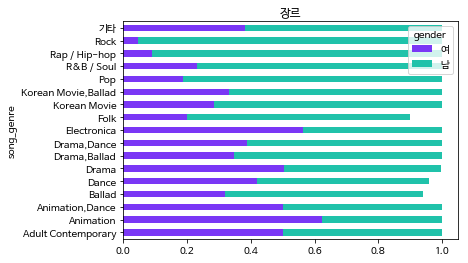

In [168]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = genre_result.plot(kind="barh", title="장르", stacked=True,color=["#7A37F5", "#20C2AA","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])
ax

In [238]:
genre = song.groupby(["gender", "song_genre"]).size().unstack(0)

In [239]:
genre = genre.drop(columns=['혼'])

In [181]:
# genre = genre.dropna()
# genre

gender,남,여
song_genre,,
Adult Contemporary,1.0,1.0
Animation,9.0,15.0
"Animation,Dance",1.0,1.0
Ballad,1371.0,706.0
Dance,2890.0,2256.0
Drama,103.0,106.0
"Drama,Ballad",15.0,8.0
"Drama,Dance",11.0,7.0
Electronica,17.0,22.0


In [240]:
genre = genre.sort_values(by='여', ascending=False)
genre.shape

(33, 2)

In [241]:
genre

gender,남,여
song_genre,,
Dance,2890.0,2256.0
Ballad,1371.0,706.0
Drama,103.0,106.0
R&B / Soul,332.0,100.0
Rap / Hip-hop,564.0,57.0
Rock,478.0,23.0
Electronica,17.0,22.0
기타,26.0,16.0
Animation,9.0,15.0


In [206]:
genre.loc['기타'] = 

gender
남    26.0
여    16.0
Name: 기타, dtype: float64

In [222]:
etc = genre.index[8:33]

In [225]:
genre = genre.rename(index={etc: '기타'})

TypeError: unhashable type: 'Index'

In [229]:
a = genre.index[8:33].append(pd.Index(['기타']))

In [230]:
a

Index(['Animation', 'Drama,Ballad', 'Drama,Dance', 'Game', 'Korean Movie',
       'Pop', 'Folk', 'Korean Traditional', 'Adult Contemporary',
       'Korean Movie,Ballad', 'Jazz', 'Electronica,Dance', 'Blues',
       'Ballad,Rap / Hip-hop', 'Animation,Dance', '동요', 'Animation,Rock',
       'Dance,Electronica', 'Drama,Folk', 'Drama,Rap / Hip-hop', 'Drama,Rock',
       'Korean Movie,Rock', 'Musical', 'Rap / Hip-hop,Dance', '국내CCM', '기타'],
      dtype='object')

In [ ]:
genre.iloc[8:33] = 

In [ ]:
df.groupby([‘Column_1’, ‘Column_2’], as_index=false).agg(‘sum’)

In [207]:
genre.loc['기타'] = genre.iloc[8:33, [0,1]].sum()

genre.loc['기타']

gender
남    88.0
여    52.0
Name: 기타, dtype: float64

In [249]:
genre = genre.rename({'Animation':'기타', 'Drama,Ballad':'기타', 'Drama,Dance':'기타', 'Game':'기타', 'Korean Movie':'기타',
       'Pop':'기타', 'Folk':'기타', 'Korean Traditional':'기타', 'Adult Contemporary':'기타',
       'Korean Movie,Ballad':'기타', 'Jazz':'기타', 'Electronica,Dance':'기타', 'Blues':'기타',
       'Ballad,Rap / Hip-hop':'기타', 'Animation,Dance':'기타', '동요':'기타', 'Animation,Rock':'기타',
       'Dance,Electronica':'기타', 'Drama,Folk':'기타', 'Drama,Rap / Hip-hop':'기타', 'Drama,Rock':'기타',
       'Korean Movie,Rock':'기타', 'Musical':'기타', 'Rap / Hip-hop,Dance':'기타', '국내CCM':'기타',}, axis='index')

In [250]:
genre

gender,남,여
song_genre,,
Dance,2890.0,2256.0
Ballad,1371.0,706.0
Drama,103.0,106.0
R&B / Soul,332.0,100.0
Rap / Hip-hop,564.0,57.0
Rock,478.0,23.0
Electronica,17.0,22.0
기타,26.0,16.0
기타,9.0,15.0


In [252]:
# genre.groupby(['song_genre'], as_index=False).agg('sum')
genre = genre.groupby(['song_genre']).sum()

In [257]:
order = genre.columns.tolist()
order

['남', '여']

In [258]:
order = order[-1:] + order[:-1]
order

['여', '남']

In [260]:
genre = genre[order]

In [278]:
genre = genre.sort_values(by='여', ascending=False)

In [279]:
genre_transposed = genre.T
genre_transposed

song_genre,Dance,Ballad,Drama,R&B / Soul,기타,Rap / Hip-hop,Rock,Electronica
gender,,,,,,,,
여,2256.0,706.0,106.0,100.0,68.0,57.0,23.0,22.0
남,2890.0,1371.0,103.0,332.0,114.0,564.0,478.0,17.0


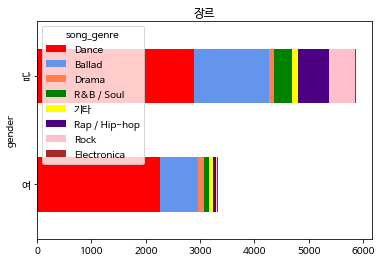

In [280]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
genre_transposed.plot(kind="barh", title="장르", stacked=True,color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])

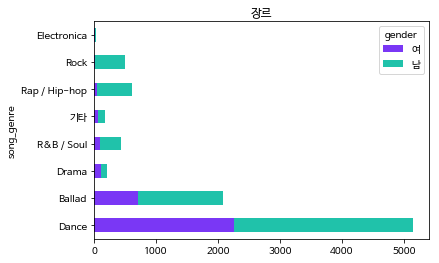

In [288]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = genre.plot(kind="barh", title="장르", stacked=True,
                color=["#7A37F5", "#20C2AA","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])
ax

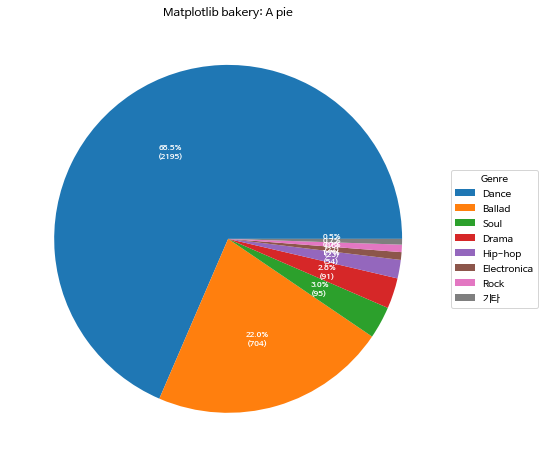

In [59]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

genre = ["2195 Dance",
          "704 Ballad",
          "96 R&B / Soul",
          "91 Drama",
          "55 Rap / Hip-hop",
          "23 Electronica",
          "22 Rock",
          "17 기타"]

data = [float(x.split()[0]) for x in recipe]
Genre = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(genre)))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
# ax.pie(colors=colors)

ax.legend(wedges, ingredients,
          title="Genre",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

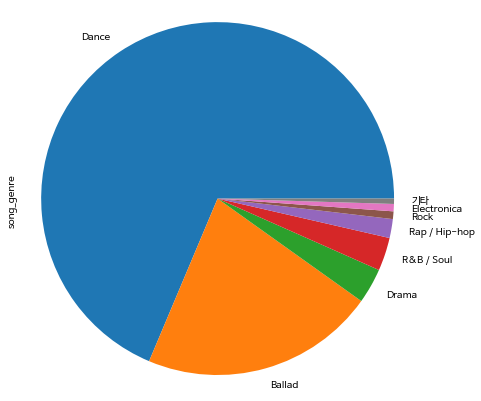

In [89]:
female['song_genre'].value_counts()[:8].plot(kind='pie')
# plt.axis("image")
plt.axis('equal')
plt.rcParams.update({'font.size': 10})
fig = plt.gcf()
fig.set_size_inches(7,7)

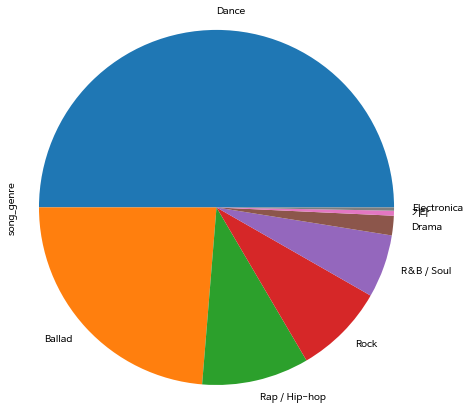

In [88]:
male['song_genre'].value_counts()[:8].plot(kind='pie')
# plt.axis("image")
plt.axis('equal')
plt.rcParams.update({'font.size': 10})
fig = plt.gcf()
fig.set_size_inches(7,7)

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

df = pandas.DataFrame(dict(graph=['Item one', 'Item two', 'Item three'],
                           n=[3, 5, 2], m=[6, 1, 3])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df.n, width, color='red', label='N')
ax.barh(ind + width, df.m, width, color='green', label='M')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()